# Integration, Interpolation, Curve Fitting

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import * # "quad" function

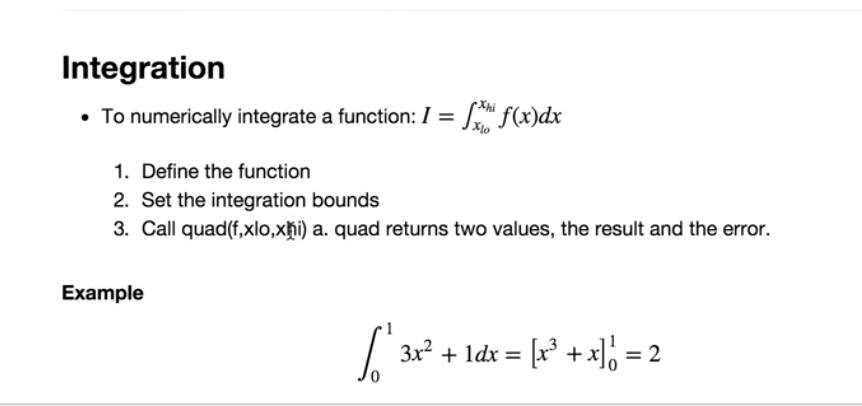

In [4]:
def f(x):
    return 3.0*x*x + 1.0

xlo = 0
xhi = 1
I, err = quad(f, xlo, xhi)

print('I     = ', I)
print('error = ', err)

I     =  2.0
error =  2.220446049250313e-14


## Interpolation

In [5]:
from scipy.interpolate import *   # 'interp1d' function

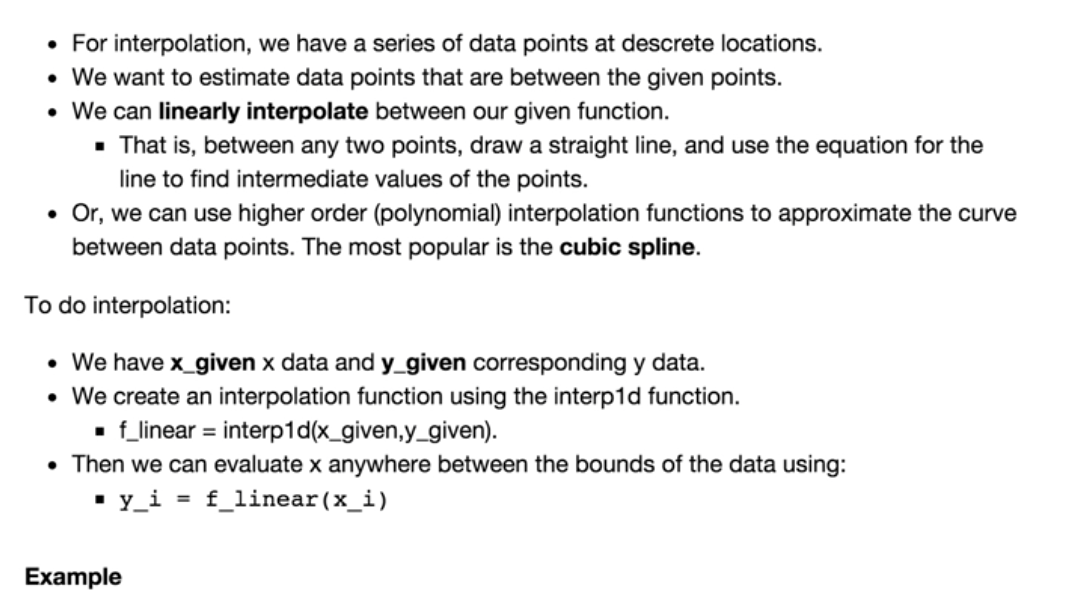

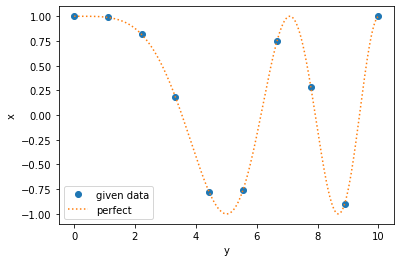

In [7]:
x_given = np.linspace(0,10,10)
y_given = np.cos(x_given**2.0/8.0)

xx = np.linspace(0,10,1000)
yy = np.cos(xx**2.0/8.0)
plt.plot(x_given,y_given, 'o', label='given data')
plt.plot(xx, yy, ':', label='perfect')
plt.ylabel('x')
plt.xlabel('y')
plt.legend(loc='best')

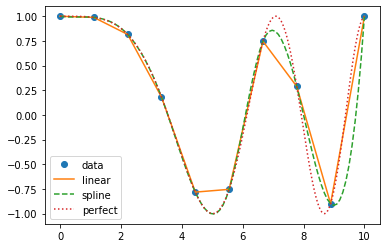

In [9]:
x_i = np.linspace(0,10,100)   # interpolate to these points

#-----Linear interpolation

f_linear = interp1d(x_given, y_given)   # get an interpolation function
y_il = f_linear(x_i)   # interpolate to y_i at x_i

#----- Spline interpolation

f_spline = interp1d(x_given, y_given, kind = 'cubic')
y_is = f_spline(x_i)

# ----- Plot the results

plt.plot(x_given, y_given, 'o')
plt.plot(x_i, y_il, '-')
plt.plot(x_i, y_is, '--')
plt.plot(xx, yy, ':')
plt.legend(['data', 'linear', 'spline', 'perfect'], loc='best')

## Curve Fitting

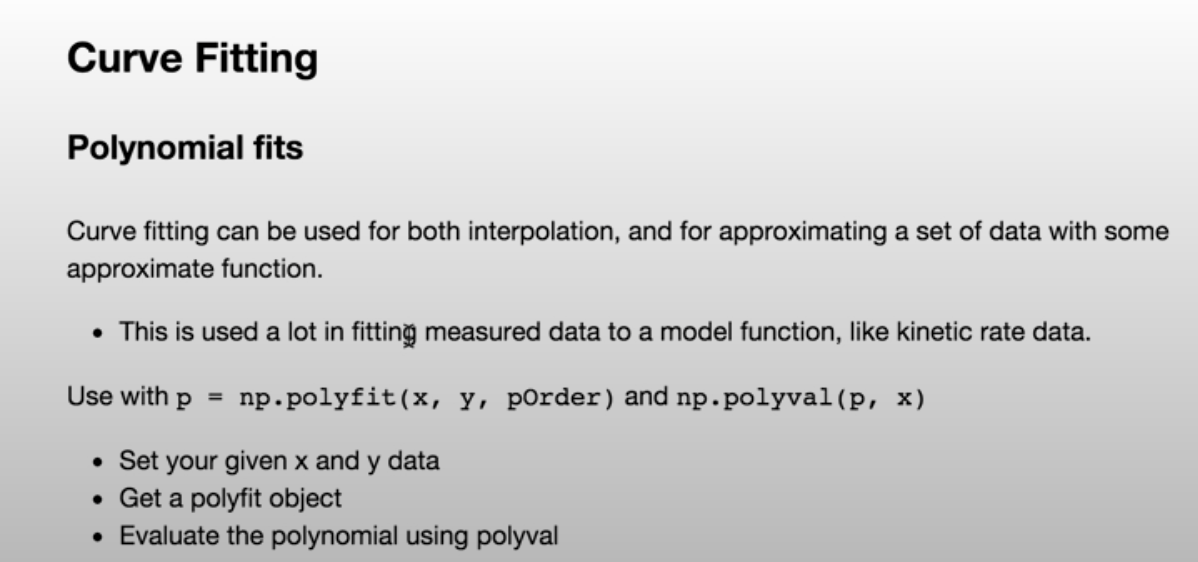

(-2, 2)

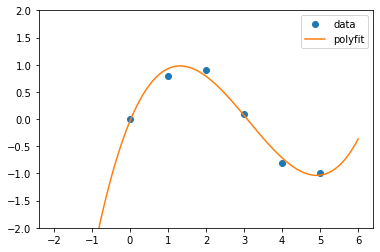

In [11]:
x_given = np.array([0., 1., 2., 3., 4., 5.])   # given x data
y_given = np.array([0., 0.8, 0.9, 0.1, -0.8, -1.0])   # given y data

x_p = np.linspace(-2.0,6.0,100)   # x data for plotting the poly fit

p3 = np.polyfit(x_given, y_given, 3)   # a polynomial object

y_p = np.polyval(p3, x_p)

plt.plot(x_given, y_given, 'o')
plt.plot(x_p, y_p, '-')
plt.legend(['data', 'polyfit'], loc='best')
plt.ylim(-2,2)

In [13]:
print(p3)

[ 0.08703704 -0.81349206  1.69312169 -0.03968254]


## General Curve Fits

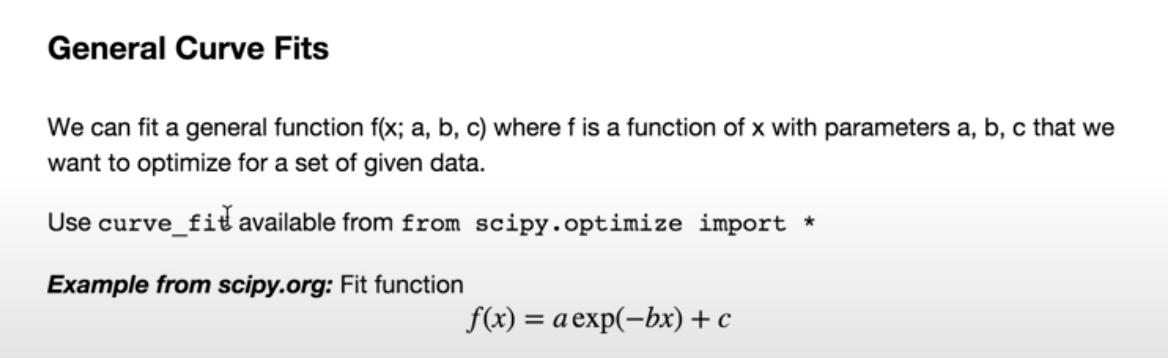

In [14]:
from scipy.optimize import *

a=2.28574, b=1.30613, c=0.549538


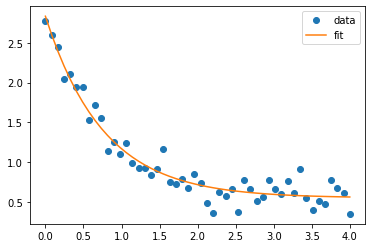

In [16]:
#----- Define the function with parameters

def f(x, a, b, c):
    return a*np.exp(-b*x) + c

#----- Set some given data

x_given = np.linspace(0,4,50)
y_given = f(x_given, 2.5,1.3, 0.5) + 0.2*np.random.normal(size=len(x_given))

#----- Do the curve fit

params, extras = curve_fit(f, x_given, y_given)

#----- Output / plot the results

print('a=%g, b=%g, c=%g' % (params[0], params[1], params[2]))


plt.plot(x_given, y_given, 'o')
plt.plot(x_given, f(x_given, params[0], params[1], params[2]))
plt.legend(['data', 'fit'], loc='best')

# Python Interpolation 1 of 4: 1d interpolation with interp1d

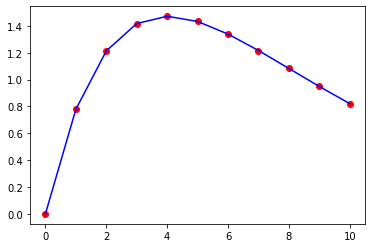

In [17]:
import numpy as np
from scipy import interpolate
import pylab as py

x = np.r_[0:10:11j] # also np.linspace(0,10,11)
y = np.exp(-x/4)*x

f = interpolate.interp1d(x,y)
xnew = np.r_[0:10:100j]

py.figure(1)
py.clf()
py.plot(x,y,'ro',xnew, f(xnew), 'b-')

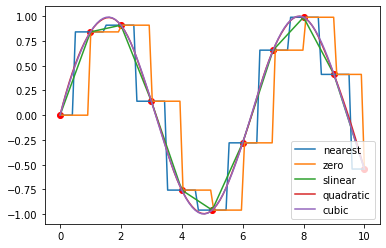

In [18]:
import numpy as np
from scipy import interpolate
import pylab as py

x = np.r_[0:10:11j] # also np.linspace(0,10,11)
y = np.sin(x)

xnew = np.r_[0:10:100j]

py.figure(1)
py.clf()
py.plot(x,y,'ro')
for kind in ['nearest', 'zero', 'slinear', 'quadratic', 'cubic']:
    f = interpolate.interp1d(x,y,kind=kind)
    ynew = f(xnew)
    py.plot(xnew, ynew, label = kind)
    
py.legend(loc='lower right')

# Python Interpolation 2 of 4: 1d interpolation with Rbf

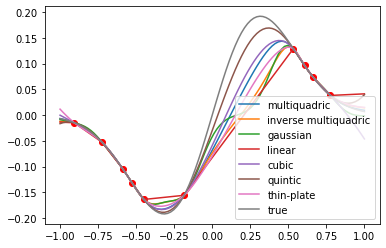

In [22]:
import numpy as np
from scipy import interpolate
import pylab as py

def func(x):
    return x*np.exp(-5.0*x**2)

x = np.random.uniform(-1.0,1.0, size=10)
fvals = func(x)
py.figure(1)
py.clf()
py.plot(x, fvals, 'ro')
xnew = np.linspace(-1,1,100)

for kind in ['multiquadric', 'inverse multiquadric', 'gaussian', 'linear', 'cubic', 'quintic', 'thin-plate']:
    newfunc = interpolate.Rbf(x, fvals, function=kind)
    fnew = newfunc(xnew)
    py.plot(xnew, fnew, label=kind)
    
py.plot(xnew, func(xnew), label='true')
py.legend(loc='lower right')

# Python Interpolation 3 of 4: 2d interpolation with Rbf and interp2d

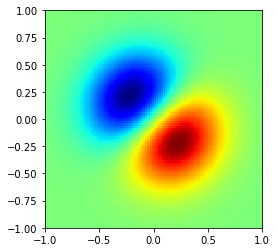

In [38]:
import numpy as np
from scipy import interpolate
import pylab as py

def func(x, y):
    return (x+y)*np.exp(-5.0*(x**2 + y**2))

x,y = np.mgrid[-1:1:15j, -1:1:15j]
fvals = func(x,y)

newfunc = interpolate.interp2d(x, y, fvals, kind='cubic')

# Notice that we evaluate on new 1-d arrays
xnew = np.linspace(-1,1,100)
ynew = xnew

# Return the cross product
fnew = newfunc(xnew, ynew)

py.figure(1)
py.clf()
py.imshow(fnew, extent = [-1,1,-1,1], cmap=py.cm.jet)




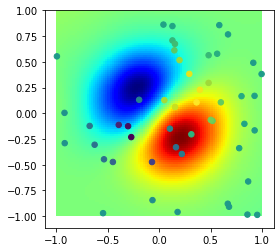

In [51]:
import numpy as np
from scipy import interpolate
import pylab as py

def func(x, y):
    return (x+y)*np.exp(-5.0*(x**2 + y**2))

x = np.random.uniform(-1.0,1.0, size= 50)
y = np.random.uniform(-1.0,1.0, size= 50)
fvals = func(x,y)
newfunc = interpolate.Rbf(x,y,fvals, function='multiquadric')
xnew, ynew = np.mgrid[-1:1:100j, -1:1:100j]
fnew = newfunc(xnew, ynew)
true = func(xnew, ynew)

#Create image plot
py.figure(1)
py.clf()
py.imshow(fnew, extent=[-1,1,-1,1], cmap=py.cm.jet)
py.scatter(x,y,30, fvals)

# Interpolation with Python 4 of 4: 2d interpolation with ndimage

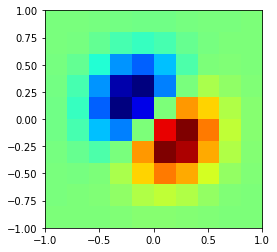

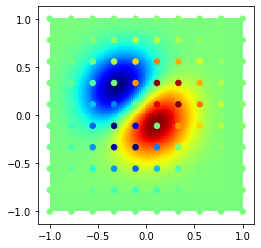

In [47]:
import numpy as np
from scipy.ndimage import map_coordinates
import pylab as py

def func(x, y):
    return (x+y)*np.exp(-5.0*(x**2 + y**2))

def map_to_index(x, y, bounds, N, M):
    xmin, xmax, ymin, ymax = bounds
    i1 = (x-xmin)/(xmax-xmin)*N
    i2 = (y-ymin)/(ymax-ymin)*N
    return i1, i2

x, y = np.mgrid[-1:1:10j, -1:1:10j]
fvals = func(x,y)

xnew, ynew = np.mgrid[-1:1:100j, -1:1:100j]
i1, i2 = map_to_index(xnew, ynew, [-1,1,-1,1], *x.shape)

fnew = map_coordinates(fvals, [i1, i2])
true = func(xnew, ynew)

# Create image plot
py.figure(1)
py.clf()
py.imshow(fvals, extent = [-1,1,-1,1], cmap=py.cm.jet)
py.figure(2)
py.clf()
py.imshow(fnew, extent = [-1,1,-1,1], cmap=py.cm.jet)
py.scatter(x,y,30, fvals, cmap=py.cm.jet)

# Interpolating .log files

In [ ]:
"""
try to interpolate .log files
"""


import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import sys
from scipy.ndimage import map_coordinates
import pylab as py

print("The arguments are: " + str(sys.argv))


if len(sys.argv) < 2:
    print('Uh Oh! You did not provide a command line argument that had the name of the file!')
    exit()
    
else:
    fileName = sys.argv[1]
    print("reading " + fileName)
    
    
def variables(fileName):
    readFile = open(fileName, 'r')
    data = readFile
    printThisLine = False
    for line in data:
        if 'Summary of the potential surface scan:' in line:
            printThisLine = True
        if '-----------' in line:
            printThisLine = False
        if printThisLine:
            listline = line.split()
            if 'SCF' in listline:
                variables = listline[1:-1]
                linelength = len(listline)

    readFile.close()
    return variables, linelength

outputvariables, outputvariableslength = variables(fileName)
print(F'Given these variables: {outputvariables}')
dimension = input("How many variables do you want to analyze? ")


if dimension == '2': 
    
    def variables(fileName):
        readFile = open(fileName, 'r')
        data = readFile
        printThisLine = False
        for line in data:
            if 'Summary of the potential surface scan:' in line:
                printThisLine = True
            if '-----------' in line:
                printThisLine = False
            if printThisLine:
                listline = line.split()
                if 'SCF' in listline:
                    variables = listline[1:-1]   

        readFile.close()
        return variables
    
    def PrintArraySCF(fileName):
        readFile = open(fileName, 'r')
        scflist = []
        data = readFile
        for line in data:
            if "SCF Done" in line:
                energy_line = line
                words = energy_line.split()
                energy = words[4]
                energy = float(energy)
                scflist.append(energy)

        readFile.close()
        return np.array(scflist)

    def getVariableIndex(fileName, variable):
        readFile = open(fileName, 'r')
        var = variable
        data = readFile
        printThisLine = False
        for line in data:
            if 'Summary of the potential surface scan:' in line:
                printThisLine = True
            if '-----------' in line:
                printThisLine = False
            if printThisLine:
                listline = line.split()
                if var in listline:
                    index = listline.index(var)    

        readFile.close()
        return index

    def arrayVariable(fileName, variable):
        readFile = open(fileName, 'r')
        var = variable
        data = readFile
        variablelist = []
        printThisLine = False
        for line in data:
            if 'Summary of the potential surface scan:' in line:
                printThisLine = True
            if 'JKIM22' in line:
                printThisLine = False
            if printThisLine:
                listline = line.split()
                if len(listline) == outputvariableslength:
                    if len(listline[0]) < 4 & len(listline[1]) > 2:
                        desiredvar = float(listline[var])
                        variablelist.append(desiredvar)

        readFile.close()
        return np.array(variablelist)

    var1in = input("What is the first variable (x)? ")
    var2in = input("What is the second variable (y)? ")

    var1 = getVariableIndex(fileName, var1in)
    var2 = getVariableIndex(fileName, var2in)
    
    x = arrayVariable(fileName, var1)
    y = arrayVariable(fileName, var2)
    z = PrintArraySCF(fileName)

    editedx = x
    editedy = y

    fig = plt.figure()
    ax1 = fig.add_subplot(111, projection = '3d')
    ax1.scatter(editedx, editedy, z, c=z, cmap='RdBu')
    ax1.set_xlabel(F'{var1in} (Angstrom)')
    ax1.set_ylabel(F'{var2in} (Degrees)')
    ax1.set_zlabel('Energy (a.u.)')
    ax1.set_title(F'{fileName}')
    plt.show()
    


    
